# <center> Overviews tools </center>

## Khảo sát số lượng các nghiên cứu trong và ngoài nước

In [2]:
def ReadCount(file_csv): # Doc file dem csv
    year = []
    count = []
    with open(file_csv) as t:
        next(t)
        next(t)
        for line in t:
            aline = line.rstrip().split(",")
            year.append(aline[0])
            count.append(int(aline[1]))
    #print(year)
    #print(count)
    return year[::-1], count[::-1]

In [3]:
year_global, count_global = ReadCount("tong.csv") # Doc du lieu file tong tat ca
#print(year_global)
#print(count_global)

year_vn, count_vn = ReadCount("vn.csv") # Doc du lieu file tong tat ca
#print(year_vn)
#print(count_vn)

In [4]:
## Tru so luong cac nam co vn de ve stack bar
indexs = [i for i in range(len(year_global)) if year_global[i] in year_vn] # index cac nam trung
#print(indexs)

count_global_pre = [] # Chinh sua count global
count_vn_pre = [] # Chinh sua count vn
for i in range(len(count_global)):
    if i not in indexs:
        count_global_pre.append(count_global[i])
        count_vn_pre.append(0)
    else:
        count_global_pre.append(count_global[i]-count_vn[indexs.index(i)])
        count_vn_pre.append(count_vn[indexs.index(i)])
#print(count_global_pre)
#print(count_vn_pre)

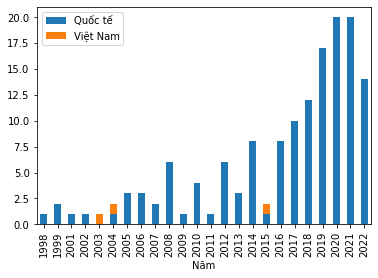

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Ve stackbar
data = pd.DataFrame(zip(year_global,count_global_pre,count_vn_pre),columns=["Năm","Quốc tế","Việt Nam"]) # Tao dataframe
#print(data)

# plot data in stack manner of bar type
data.plot(x='Năm', kind='bar', stacked=True,)
plt.show()

## Tìm tên vi khuẩn trong các bài báo 

In [6]:
## Đọc dữ liệu
with open("find_org.txt", encoding="utf-8") as f:
    tem_para = [] # Ghep thanh cac paragraph
    tem_line = ""
    for line in f:
        if line == "\n":
            tem_para.append(tem_line)
            tem_line = ""
        else:
            tem_line += line.rstrip() + " " 
    #print(tem_para[3])
    data_term = []
    tem_data = ""
    for para in tem_para:
        if "PMID:" in para:
            tem_data += para + "\n"
            data_term.append(tem_data)
            tem_data = ""
        elif "Conflict of interest statement:" in para:
            data_term[-1] += para + "\n"
        else:
            tem_data +=  para + "\n"
    print(data_term[1])



2. Arch Tierernahr. 2001;54(1):1-17. doi: 10.1080/17450390109381962. 
Growth behaviour of a spore forming probiotic strain in the gastrointestinal tract of broiler chicken and piglets. 
Jadamus A(1), Vahjen W, Simon O. 
Author information: (1)Institute of Animal Nutrition, Faculty of Veterinary Medicine, Free University Berlin, Brümmerstrasse 34, D-14195 Berlin, Germany. jadamus@zedat.fu-berlin.de 
The growth behaviour of the probiotic strain Bacillus cereus var. toyoi in the gastrointestinal tract of broiler chicken and suckling piglets was evaluated. The strain germinated rapidly in intestinal samples from both animal species. Less than 10% of spores were recovered from the chicken crop and piglet stomach, respectively. Lumen samples and mucosal tissues from the hind gut of piglets displayed increasing colonization of the probiotic strain throughout the trial period. After oral administration of vegetative cells to broiler chicken and weaned piglets, sporulation was detected in all 

In [7]:
def CheckSpec(word): # Check word co ky tu dac biet
    special_characters = "!\"#$%&'()*+,-/:;<=>?@[\]^_`{|}~"
    word_char = [x for x in word]
    #print(word_char)
    ans = False
    for w in word_char:
        if w in special_characters:
            ans = True
            break
    return ans
#print(CheckSpec("asf"))

def CheckUp(word): 
    ans = False 
    
    for w in word:
        if w.isnumeric(): # check trong word co so
            ans = True
            break

    car = word.split(" ") 
    if len(car[0]) < 7 and len(car[0]) > 2: # Loai cac word co do dai tu dau < 7 vaf > 2 
        ans = True 
    if len(car[0]) == 2: # Neu do dai la 2 thi ky tu 2 phai la . (vd: L., B.)
        if car[0][1] != ".":
            ans = True
    if "." in car[0] and len(car[0]) != 2: # Neu co . trong tu dau ma do dai <> 2 thi loai
        ans = True


    if len(car[1]) < 4: # Loai cac word co do dai tu dau < 7 vaf > 2 
        ans = True 

    a = 0
    for i in car[0]: # Check trong chu tu dau tien co tren 1 tu viet hoa
        if i.isupper():
            a += 1
        if a == 2:
            ans = True
            break  

    return ans
#print(CheckUp("aNh"))

## Trich xuat ten vi khuan (lay tieu de va abtract trich xuat tu in hoa)
data_term = [da.strip() for da in data_term]
#print(data_term[1])

ti_ab = [term.split("\n")[1] + term.split("\n")[4].lstrip() for term in data_term] # Trich xuat tieu de vaf abtract

def FindName(ti_ab,page): # Tim kiem ten vi khuan trong cac page
    #print(ti_ab[page])
    words = ti_ab[page].strip().split(" ") # Chuyen thanh list tu
    #print(words)

    name = [words[i] + " " +  words[i+1] for i in range(len(words)) if words[i][0].isupper() and words[i-1][-1] != "." and len(words[i]) != 1 and i != len(words)-1] # Loc ra ten in hoa
    #print(name) 

    ## Loc lan 1
    name_sorted1 = []
    tem = [name_sorted1.append(i) for i in name if i not in name_sorted1] # Loc ten trung nhau
    #print(name_sorted1)

    ## Loc lan 2
    name_sorted2 = [i for i in name_sorted1 if CheckSpec(i) == False] # Loc cac ky tu dac biet
    #print(name_sorted2)

    ## Loc lan 3
    # Check trong chu tu dau tien co tren 1 tu viet hoa 
    # Chu cai thu 2 la so
    name_sorted3 = [i for i in name_sorted2 if CheckUp(i) == False] 
    #print(name_sorted3)
    return ", ".join(name_sorted3)
#print(FindName(ti_ab,7))

list_keys = [FindName(ti_ab,page) for page in range(len(ti_ab))]
print("\n".join(list_keys))


Enterococcus faecium, E. faecium, Salmonella enteritidis, Staphylococcus aureus
Bacillus cereus, B. cereus
Lactobacillus curvatus, Isolated from, Chicken Ceca., Lactobacillus strains, Campylobacter jejuni, Listeria monocytogenes, Bacillus subtilis, B. subtilis
Lactobacillus paracasei, Intestinal Microflora.
Saccharomyces cerevisiae, Chemical Industry.
Lactobacillus strain, Clostridium perfringens, Lactobacillus populations, Clostridium coccoides, Faecalibacterium prausnitzii, C. coccoides, Lactobacillus population.
L. ingluviei
Chicken Growth, S. cerevisiae, P. Other
Enterococcus faecium, Isolated from, Chicken Cecum, Immunomodulating Activity, Promoting Longevity, Caenorhabditis elegans., Enterococcus strain, E. faecium, Salmonella Typhimurium, Typhimurium infection, C. elegans
Lactobacillus reuteri, L. reuteri
Lactobacillus salivarius, L. salivarius, Actinobacteria were
Lactobacillus reuteri
Probiotic Bacillus, Bacillus subtilis, Increases Antioxidant, Antioxidant Capacity, Oxidative

## Trích xuất lợi khuẩn và hại khuẩn

In [8]:
## Doc du lieu
daa = []
with open("useful_org.txt") as file:
    for line in file:
        tem = line.rstrip().split(", ")
        for i in range(len(tem)):
            if len(tem[i]) > 0 and tem[i][-1] == ".":
                tem[i] = tem[i][:-1]
        daa.append(tem)
print(daa)

[['Enterococcus faecium', 'E. faecium'], ['Bacillus cereus'], ['Lactobacillus curvatus', 'Bacillus subtilis', 'B. subtilis'], ['Lactobacillus paracasei'], ['Saccharomyces cerevisiae'], ['Clostridium perfringens', 'Faecalibacterium prausnitzii'], ['L. ingluviei'], ['S. cerevisiae'], ['Enterococcus faecium', 'Caenorhabditis elegans', 'E. faecium', 'C. elegans'], ['Lactobacillus reuteri', 'L. reuteri'], ['Lactobacillus salivarius', 'L. salivarius'], ['Lactobacillus reuteri'], ['Bacillus subtilis'], ['Lactobacillus crispatus', 'Lactobacillus crispatus', 'L. crispatus', 'L. crispatus'], ['Bacillus subtilis', 'Bacillus licheniformis', 'B. subtilis', 'B. licheniformis'], ['Lactobacillus rhamnosus', 'L. rhamnosus'], ['Lactobacillus salivarius'], ['L. fermentum', 'L. animalis'], ['Lactobacillus casei', 'Lactobacillus casei'], [''], ['Lactobacillus animalis', 'Lactobacillus reuteri'], [''], ['Lactobacillus plantarum', 'L. plantarum', 'Lactobacillus fermentum'], ['Lactobacillus acidophilus', 'L. 

In [9]:
def CheckSec(word1,word2): # Check tu thu 2 cua 2 chu
    ans = False
    if word1.split(" ")[1] == word2.split(" ")[1]:
        ans = True
    return ans
#print(CheckSec('Enterococcus faecium', 'E. faecium'))

def Locten(lis):# Loc ten duy nhat trong list
    ten_sec = []
    ten_fir = []
    for t in lis:
        if t.split(" ")[1] in ten_sec:
            if len(t.split(" ")[0]) > len(ten_fir[ten_sec.index(t.split(" ")[1])]):
                ten_fir[ten_sec.index(t.split(" ")[1])] = t.split(" ")[0]
        else:
            ten_fir.append(t.split(" ")[0])
            ten_sec.append(t.split(" ")[1])
    #print(ten_fir)
    #print(ten_sec)

    name_sort = [ten_fir[i] + " " + ten_sec[i] for i in range(len(ten_fir))]
    #print(name_sort)
    return name_sort
#print(Locten(lis))

lib = {}
for lis in daa:
    if len(lis) > 1:
        name = Locten(lis) # Ten duy nhat cua vi khuan
        #print(name)
        for ten in name:
            if ten not in lib:
                lib[ten] = 1
            else:
                lib[ten] += 1
        #print(lib)
print(lib)


{'Enterococcus faecium': 2, 'Lactobacillus curvatus': 1, 'Bacillus subtilis': 4, 'Clostridium perfringens': 1, 'Faecalibacterium prausnitzii': 1, 'Caenorhabditis elegans': 1, 'Lactobacillus reuteri': 4, 'Lactobacillus salivarius': 3, 'Lactobacillus crispatus': 3, 'Bacillus licheniformis': 1, 'Lactobacillus rhamnosus': 2, 'L. fermentum': 1, 'L. animalis': 1, 'Lactobacillus casei': 1, 'Lactobacillus animalis': 2, 'Lactobacillus plantarum': 1, 'Lactobacillus fermentum': 1, 'Lactobacillus acidophilus': 2, 'Lactobacillus vaginalis': 1, 'Lactobacillus bearing': 1, 'L. crispatus': 1, 'L. agilis': 1, 'L. salivarius': 1, 'S. Typhimurium': 1, 'Propionibacterium freudenreichii': 1, 'Lactococcus lactis': 1, 'Bifidobacterium bifidum': 1, 'Limosilactobacillus fermentum': 1, 'Limosilactobacillus reuteri': 1}


In [10]:
def Sort_2_list(list1,list2):

    index = list(range(len(list1)))
    print(index)

    index.sort(key = list1.__getitem__)
    print(index)

    list1[:] = [list1[i] for i in index]
    list2[:] = [list2[i] for i in index]

    #print(list1)
    #print(list2)
    return list1, list2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[1, 3, 4, 5, 9, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 0, 10, 14, 17, 7, 8, 2, 6]
43


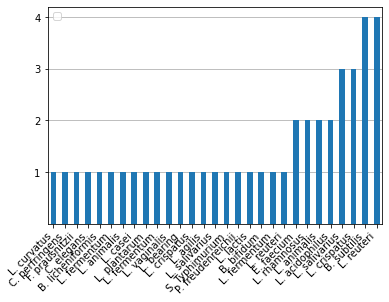

In [23]:
from matplotlib import pyplot as plt
import pandas as pd
## Vẽ biểu đồ histogram
name_bac = [key for key in lib] # Ten vi khuan probiotic
#print(name_bac)
name_hist = [name.split(" ")[0][0] + ". " + name.split(" ")[1] for name in name_bac]
#print(name_hist)

mount = [lib[i] for i in name_bac] # So luong bai bao nghien cuu
#print(mount)
mounta, name_hista = Sort_2_list(mount, name_hist)
print(sum(mounta))
#print(name_hista)

# Figure Size
''''
fig_1 = plt.figure(1, figsize=(20,7))
plt.bar(name_hista,mounta, zorder = 3)
plt.xticks(rotation = 45, ha='right')
plt.yticks(np.arange(min(mounta), max(mounta)+1, 1))
plt.grid(zorder=0, axis="y")
plt.show()
'''

data = pd.DataFrame(zip(mounta, name_hista),columns=["Sl","name"]) # Tao dataframe
#print(data)
# Horizontal Bar Plots
data.plot(x='name', kind='bar', zorder = 3)
plt.xticks(rotation = 45, ha='right') # Rotates X-Axis Ticks by 45-degrees
plt.yticks(np.arange(min(mounta), max(mounta)+1, 1))
plt.xlabel("")
plt.legend('')
plt.grid(zorder=0, axis="y")
# Show Plot
plt.show()
